In [2]:
import ROOT
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.18/00


In [26]:
def load_data(data):
    df = pd.read_csv(data)

    for col in df.columns:
        df[col] = df[col].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])
    return df

In [29]:
df = load_data("data.csv")

In [30]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

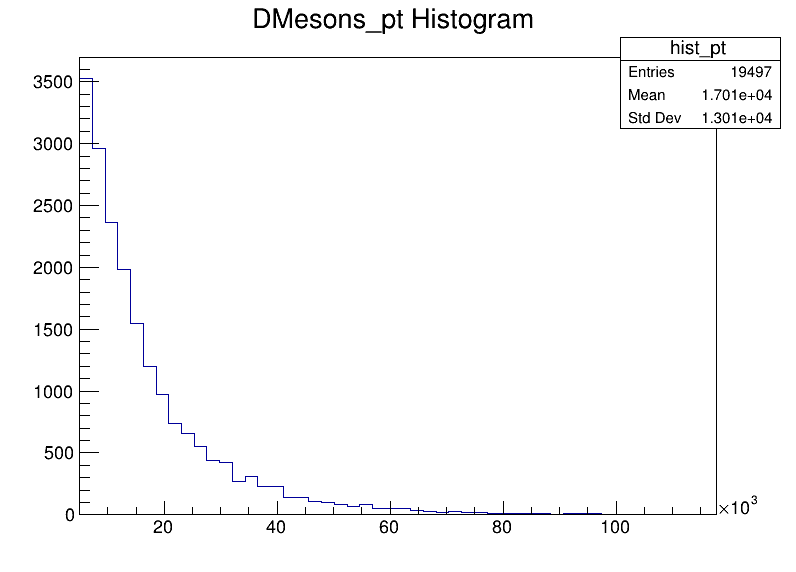

In [31]:
#Example ROOT plot
# data = np.random.normal(size=1000)

# hist = ROOT.TH1F("hist", "Example histogram", 50, -5, 5)

# for x in data:
#     hist.Fill(x)

# canvas = ROOT.TCanvas("canvas", "Example histogram", 800, 600)
# hist.Draw()
# canvas.Draw()

nbins = 50
xmin = np.min(df["DMesons_pt"])[0]
xmax = np.max(df["DMesons_pt"])[0]

hist = ROOT.TH1F("hist_pt", "DMesons_pt Histogram", nbins, xmin, xmax)

for i in range(len(df["DMesons_pt"])):
    pt = df["DMesons_pt"][i]
    for val in pt:
        hist.Fill(val)

# Draw the histogram
c = ROOT.TCanvas("c", "c", 800, 600)
hist.Draw()
c.Draw()

In [32]:
DMesonList = []

for index, row in df.iterrows():
    pt = row['DMesons_pt']
    eta = row['DMesons_eta']
    phi = row['DMesons_phi']
    m = row['DMesons_m']
    
    #TLorentzVector object for the current row
    p = ROOT.TLorentzVector()
    p.SetPtEtaPhiM(df['DMesons_pt'][0][0], df['DMesons_eta'][0][0], df['DMesons_phi'][0][0], df['DMesons_m'][0][0])
    
    # for i in range(1, len(pt)):
    #     p += ROOT.TLorentzVector().SetPtEtaPhiM(pt[i], eta[i], phi[i], m[i])
    
    DMesonList.append(p)


In [45]:
inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

TLorentzVectorsInvMass = []
for i in range(len(DMesonList[:10000])):
    p1 = DMesonList[i]
    m2 = inv_mass_squared(p1, p1)
    TLorentzVectorsInvMass.append(m2)


In [46]:
np.sqrt(np.array(TLorentzVectorsInvMass[:10]))

array([ 3720.16186523,  3720.16186523,  3720.16186523,  3720.16186523,
        3720.16186523,  3720.16186523,  3720.16186523,  3720.16186523,
        3720.16186523,  3720.16186523])